In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_Set = pd.read_excel("Product Analyst-Data Set.xlsx",sheet_name=1,index_col=None)

In [4]:
data_Set

,Unnamed: 0,User_ID,Age_Group,Preferred_Cuisine,Last_Visited_Restaurant,Recommendation_Clicked,Reservation_Made,Visit_Rating
0,0.0,A001,36-45,Chinese,Ocean Bites,Yes,Yes,3.4
1,1.0,A002,36-45,Italian,Elite Eatery,No,No,NaN
2,2.0,A003,36-45,Mexican,Spicy Affair,Yes,No,NaN
3,3.0,A004,46-55,North Indian,Curry Corner,Yes,No,NaN
4,4.0,A005,36-45,North Indian,Pasta Palace,Yes,No,NaN
...,...,...,...,...,...,...,...,...
995,995.0,A996,18-25,Italian,Curry Corner,Yes,Yes,4.1
996,996.0,A997,46-55,North Indian,Fishy Feast,No,No,NaN
997,997.0,A998,46-55,Continental,Fishy Feast,Yes,Yes,3.2
998,998.0,A999,46-55,North Indian,Bella Italia,No,No,NaN


## Determine the overall success rate of the recommendation engine in terms of user clicks and reservations made.

So we're doing two calculations. 
1. click_rate, which returns the percentage of users who clicked on our recommendations.
2. reservation_rate, which gives us a percentage of how many users booked utilising our recommendations.

In [6]:
click_rate = data_Set['Recommendation_Clicked'].value_counts(normalize=True).get('Yes',0)
print("click_rate : {:.2%}".format(click_rate))

click_rate : 49.40%


In [7]:
reservation_rate = data_Set['Reservation_Made'].value_counts(normalize=True).get('Yes',0)
print("reservation_rate : {:.2%}".format(reservation_rate))

reservation_rate : 33.70%


## Analyze the effectiveness of recommendations based on the `Age_Group` and `Preferred_Cuisine`. Identify any patterns or segments where recommendations are particularly successful or lacking.Analyze the effectiveness of recommendations based on the `Age_Group` and `Preferred_Cuisine`. Identify any patterns or segments where recommendations are particularly successful or lacking.

We are using groupby on Age_Group and Preferred_Cuisine, then dividing the results into two sections: successful_recommendation (>50%) and lacking_recommendation (50%).

We can then utilise this information to determine which Cuisine and Age_group are lacking and modify our model accordingly.


In [9]:
recommend = data_Set.groupby(['Age_Group','Preferred_Cuisine']).agg({
    'Recommendation_Clicked' : lambda x:x.value_counts(normalize=True).get('Yes',0),
    'Reservation_Made' : lambda x:x.value_counts(normalize=True).get('Yes',0)
}).reset_index()

recommend['Recommendation_Clicked']= recommend['Recommendation_Clicked'] * 100
recommend['Recommendation_Clicked']= recommend['Recommendation_Clicked'].round(2)

recommend['Reservation_Made']= recommend['Reservation_Made'] * 100
recommend['Reservation_Made']= recommend['Reservation_Made'].round(2)

recommend

,Age_Group,Preferred_Cuisine,Recommendation_Clicked,Reservation_Made
0,18-25,Chinese,34.38,18.75
1,18-25,Continental,46.43,39.29
2,18-25,Italian,60.87,34.78
3,18-25,Mexican,43.33,36.67
4,18-25,North Indian,48.15,29.63
5,18-25,Seafood,53.85,42.31
6,18-25,Vegan,48.00,32.00
7,26-35,Chinese,56.52,39.13
8,26-35,Continental,50.00,36.67
9,26-35,Italian,36.67,23.33


In [11]:
successful_recommendation = recommend[recommend['Recommendation_Clicked'] >= 50.0]
successful_recommendation

,Age_Group,Preferred_Cuisine,Recommendation_Clicked,Reservation_Made
2,18-25,Italian,60.87,34.78
5,18-25,Seafood,53.85,42.31
7,26-35,Chinese,56.52,39.13
8,26-35,Continental,50.00,36.67
10,26-35,Mexican,51.85,25.93
11,26-35,North Indian,60.00,28.00
12,26-35,Seafood,57.14,32.14
13,26-35,Vegan,51.52,39.39
15,36-45,Continental,50.00,33.33
17,36-45,Mexican,50.00,33.33


In [13]:
lacking_recommendation = recommend[recommend['Recommendation_Clicked'] < 50.0]
lacking_recommendation

,Age_Group,Preferred_Cuisine,Recommendation_Clicked,Reservation_Made
0,18-25,Chinese,34.38,18.75
1,18-25,Continental,46.43,39.29
3,18-25,Mexican,43.33,36.67
4,18-25,North Indian,48.15,29.63
6,18-25,Vegan,48.00,32.00
9,26-35,Italian,36.67,23.33
14,36-45,Chinese,46.15,34.62
16,36-45,Italian,38.10,23.81
19,36-45,Seafood,35.71,28.57
25,46-55,North Indian,30.30,18.18


## Based on the `Visit_Rating`, evaluate the satisfaction of users with the recommended restaurants.
1. We've created a simple bar graph based on count and rating below. 
2. We are also measuring the percentage of customers that are satisfied or dissatisfied with our recommendations by using 3.5 as a threshold rating.

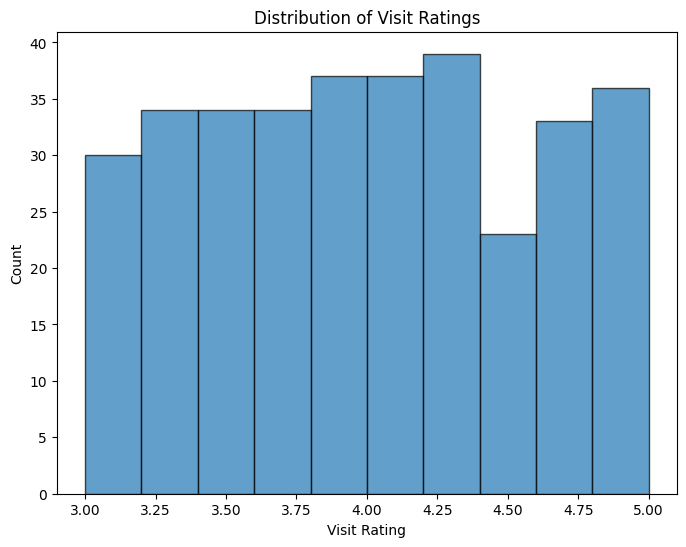

In [16]:
# Remove rows with missing visit ratings
df_cleaned = data_Set.dropna(subset=['Visit_Rating'])

# Create a histogram to visualize the distribution of visit ratings
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Visit_Rating'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Visit Rating')
plt.ylabel('Count')
plt.title('Distribution of Visit Ratings')
plt.show()

In [17]:
# Calculate the percentage of users satisfied (Visit_Rating >= 3.5)
satisfied_percentage = ((df_cleaned['Visit_Rating'] >= 3.5).mean() * 100).round(2)
satisfied_percentage


75.37

In [18]:
# Calculate the percentage of users unsatisfied (Visit_Rating < 3.5)
unsatisfied_percentage = ((df_cleaned['Visit_Rating'] < 3.5).mean() * 100).round(2)
unsatisfied_percentage

24.63

## Provide suggestions on how EazyDiner can improve its recommendation algorithm to better cater to user preferences and improve reservation rates.

To begin, we may utilise the above analysis to determine where our model falls short and make improvements in those areas.

We can experiment with several recommendation algorithms, such as 
User-based or item-based collaborative filtering strategies, for example, can be useful in creating recommendations based on user behaviours and preferences. 
Combine collaborative and content-based filtering. To deliver more personalised and relevant recommendations, use user choices and item characteristics.
By decomposing the user-item interaction matrix into latent components, matrix factorization algorithms such as Singular Value Decomposition (SVD) and Alternating Least Squares (ALS) can improve recommendation accuracy.